The dataset contains records of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases, the measurements were made after these treatments. It is a tab separated file (.csv) and contains the following columns:
* sbp - Systolic Blood Pressure
* tobacco - Cumulative tobacoo (kg)
* ldl - Low Density Lipoprotein Cholesterol
* adiposity
* famhist - Family history of heart disease (Present, Absent)
* typea - type-A behavior
* obesity
* alcohol - Current alcohol consumption
* age - Age at onset
* chd - Response, coronary heart disease

**Q1. Find out the number cases available in the dataset for chd and no chd. Is it an imbalanced dataset for classification modelling? Plot the findings using a bar plot, where x is chd or no chd and y gives the count samples in each group.**

**Ans:-**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
SA_df = pd.read_csv('SAheart.csv')
SA_df = SA_df.drop('row.names', axis=1)
SA_df.head(10)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


In [4]:
SA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [5]:
SA_df.chd.value_counts()

chd
0    302
1    160
Name: count, dtype: int64

So from above we have 34% of Yes CHD cases and 66% of No CHD cases. So the given dataset is imbalanced dataset for classification modelling.

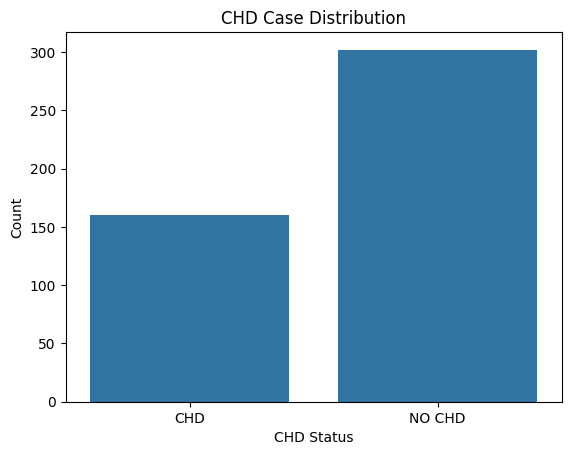

In [6]:
labels=['CHD', 'NO CHD']
counts=[160, 302]
df_chd = pd.DataFrame({'CHD_Status': labels, 'Count': counts})
sn.barplot(x='CHD_Status', y='Count', data=df_chd)
plt.xlabel("CHD Status")
plt.ylabel("Count")
plt.title("CHD Case Distribution")
plt.show()

**Q2. To create a balanced dataset, do upsampling of chd cases to be same as number of no chd cases. For upsampling, use resampling with replacement technique.**

**Ans:-**

In [7]:
from sklearn.utils import resample

chd_status_no = SA_df[SA_df.chd == 0]
chd_status_yes = SA_df[SA_df.chd == 1]

df_minority_upsampled = resample(chd_status_yes, replace=True, n_samples=302)
new_chd_df = pd.concat([chd_status_no, df_minority_upsampled])

In [9]:
from sklearn.utils import shuffle
new_chd_df = shuffle(new_chd_df)

**Q3. Maintain two datasets - imbalanced dataset (original one) and balanced dataset - using the upsampling approach. Split each of the datasets into 80:20 splits for training and test sets.**

**Ans:-**

**With Imbalanced Dataset**

In [17]:
X_features_i = list(SA_df.columns)
X_features_i.remove('chd')
X_features_i

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'famhist',
 'typea',
 'obesity',
 'alcohol',
 'age']

In [18]:
encoded_df_i = pd.get_dummies(SA_df[X_features_i], drop_first=True)
X_i = encoded_df_i

In [19]:
Y_i = SA_df.chd

In [20]:
train_X_i, test_X_i, train_y_i, test_y_i = train_test_split(X_i, Y_i, test_size=0.2, random_state=42)

**With Balanced Dataset**

In [21]:
# With Balanced Dataset
X_features_b = list(new_chd_df.columns)
X_features_b.remove('chd')
X_features_b

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'famhist',
 'typea',
 'obesity',
 'alcohol',
 'age']

In [22]:
encoded_df_b = pd.get_dummies(new_chd_df[X_features_b], drop_first=True)
X_b = encoded_df_b

In [23]:
Y_b = new_chd_df.chd

In [24]:
train_X_b, test_X_b, train_y_b, test_y_b = train_test_split(X_b, Y_b,test_size=0.2, random_state=42)

**Q4. Build a Logistic Regression Model using both the imbalanced and balanced datasets and compare results. use K-fold cross-validation (k = 5) and ROC AUC score for comparing the model performance.**

**Ans:-**

**Building Logistic Regression Models for the both the sets**

**1. For Imbalanced Dataset**

In [30]:
from sklearn.linear_model import LogisticRegression
logit_i = LogisticRegression(max_iter=200)
logit_i.fit(train_X_i, train_y_i)

LogisticRegression(max_iter=200)

In [31]:
pred_y_i  = logit_i.predict(test_X_i)

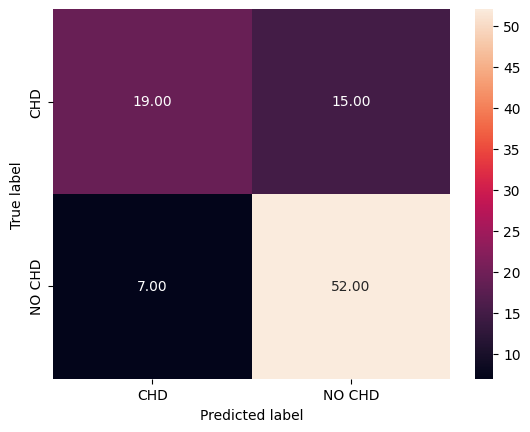

In [32]:
from sklearn import metrics

def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, labels=[1,0])
    sn.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["CHD", "NO CHD"], yticklabels = ["CHD", "NO CHD"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

cm = draw_cm(test_y_i, pred_y_i)

In [33]:
print(metrics.classification_report(test_y_i, pred_y_i))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        59
           1       0.73      0.56      0.63        34

    accuracy                           0.76        93
   macro avg       0.75      0.72      0.73        93
weighted avg       0.76      0.76      0.76        93



In [34]:
predict_proba_df_i = pd.DataFrame(logit_i.predict_proba(test_X_i))
predict_proba_df_i.head()

,0,1
0,0.701274,0.298726
1,0.750017,0.249983
2,0.141345,0.858655
3,0.496179,0.503821
4,0.693396,0.306604


In [36]:
test_results_df_i = pd.DataFrame({'actual': test_y_i})
test_results_df_i = test_results_df_i.reset_index()
test_results_df_i['chd_1'] = predict_proba_df_i.iloc[:, 1:2]
test_results_df_i

,index,actual,chd_1
0,225,0,0.298726
1,30,1,0.249983
2,39,1,0.858655
3,222,0,0.503821
4,124,0,0.306604
...,...,...,...
88,22,0,0.679310
89,358,0,0.269383
90,46,1,0.850532
91,168,0,0.108537


In [38]:
auc_score_i = metrics.roc_auc_score(test_results_df_i.actual, test_results_df_i.chd_1)
round(float(auc_score_i), 2)

0.8

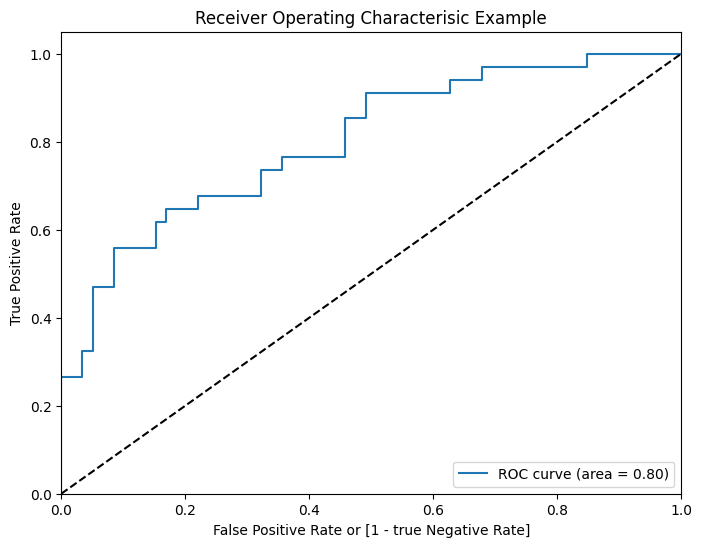

In [40]:
def draw_roc_curve(model, test_X, test_y):
    test_results_df = pd.DataFrame({'actual': test_y})
    test_results_df = test_results_df.reset_index()

    predict_proba_df = pd.DataFrame(model.predict_proba(test_X))
    test_results_df['chd_1'] = predict_proba_df.iloc[:, 1:2]

    fpr, tpr, thresholds = metrics.roc_curve(test_results_df.actual, test_results_df.chd_1, drop_intermediate=False)

    auc_score = metrics.roc_auc_score(test_results_df.actual, test_results_df.chd_1)

    plt.figure(figsize=(8, 6))

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)

    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate or [1 - true Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterisic Example')
    plt.legend(loc='lower right')
    plt.show()

    return auc_score, fpr, tpr, thresholds

_, _, _, _ = draw_roc_curve(logit_i, test_X_i, test_y_i)

So the ROC AUC score is 0.8. Now we shall check by K-fold cross-validation.

In [57]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
logit_i_2 = LogisticRegression(max_iter=1000)
scores_i = cross_val_score(logit_i_2, X_i, Y_i, cv=kfold, scoring='roc_auc') 
print("ROC AUC for each fold:", scores_i)
print("Mean ROC AUC:", round(scores_i.mean(), 2))

ROC AUC for each fold: [0.80059821 0.80737705 0.81499726 0.73270089 0.74938575]
Mean ROC AUC: 0.78


We see a drop from 0.8 to 0.78 which is reasonable to say that our model functions well.

**2. For the Balanced Dataset**

In [47]:
logit_b = LogisticRegression(max_iter=1000)
logit_b.fit(train_X_b, train_y_b)

LogisticRegression(max_iter=1000)

In [48]:
pred_y_b = logit_b.predict(test_X_b)

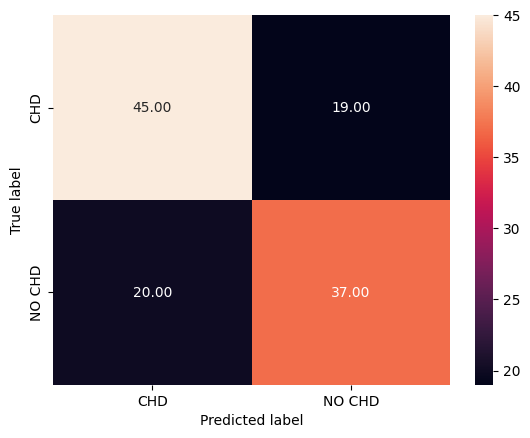

In [49]:
cm = draw_cm(test_y_b, pred_y_b)

In [50]:
print(metrics.classification_report(test_y_b, pred_y_b))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65        57
           1       0.69      0.70      0.70        64

    accuracy                           0.68       121
   macro avg       0.68      0.68      0.68       121
weighted avg       0.68      0.68      0.68       121



In [51]:
predict_proba_df_b = pd.DataFrame(logit_b.predict_proba(test_X_b))
predict_proba_df_b.head()

,0,1
0,0.558818,0.441182
1,0.316047,0.683953
2,0.218331,0.781669
3,0.919440,0.080560
4,0.498078,0.501922


In [52]:
test_results_df_b = pd.DataFrame({'actual': test_y_b})
test_results_df_b = test_results_df_b.reset_index()
test_results_df_b['chd_1'] = predict_proba_df_b.iloc[:, 1:2]
test_results_df_b

,index,actual,chd_1
0,221,1,0.441182
1,267,0,0.683953
2,189,1,0.781669
3,103,0,0.080560
4,133,0,0.501922
...,...,...,...
116,402,1,0.787174
117,356,0,0.093921
118,125,1,0.934917
119,392,0,0.521137


In [53]:
auc_score_b = metrics.roc_auc_score(test_results_df_b.actual, test_results_df_b.chd_1)
round(float(auc_score_b), 2)

0.81

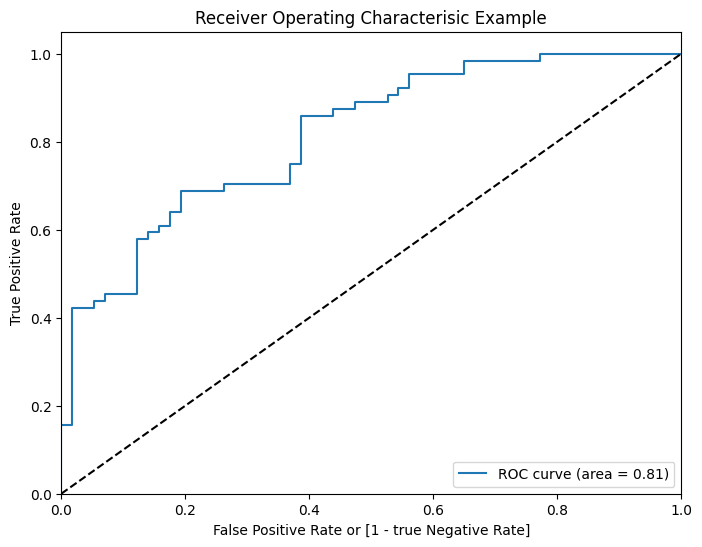

In [54]:
_, _, _, _ = draw_roc_curve(logit_b, test_X_b, test_y_b)

Here we get the ROC AUC score as 0.81. Now let us check out using K-Folds Cross-Validation.

In [56]:
logit_b_2 = LogisticRegression(max_iter=1000)
scores_b = cross_val_score(logit_b_2, X_b, Y_b, cv=kfold, scoring='roc_auc') 
print("ROC AUC for each fold:", scores_b)
print("Mean ROC AUC:", round(scores_b.mean(), 2))

ROC AUC for each fold: [0.81441886 0.75054825 0.77994505 0.82103219 0.81222098]
Mean ROC AUC: 0.8


So the for both the balanced and imbalanced data the ROC AUC score comes out to be almost same.

In [58]:
print("IMBALANCED DATASET")
print("ROC AUC score: 0.80")
print("By K-Folds, Mean ROC AUC Score: 0.78")
print(" ")
print("BALANCED DATASET")
print("ROC AUC score: 0.81")
print("By K-Folds, Mean ROC AUC Score: 0.80")

IMBALANCED DATASET
ROC AUC score: 0.80
By K-Folds, Mean ROC AUC Score: 0.78
 
BALANCED DATASET
ROC AUC score: 0.81
By K-Folds, Mean ROC AUC Score: 0.80


**Q5. Build a Random Forest model using balanced dataset. Use grid search mechanism to find the most optimal values of the following parameters:**

* n_estimators = [50, 100, 200, 500]
* max_depth = [3, 5, 7, 9]
* max_features = [0.1, 0.2, 0.3, 0.5]

**Find the best model based on ROC_AUC score.**

**Ans:-**

**Building Random Forest Model**

In [59]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(max_depth=10, n_estimators=10)
radm_clf.fit(train_X_b, train_y_b)

RandomForestClassifier(max_depth=10, n_estimators=10)

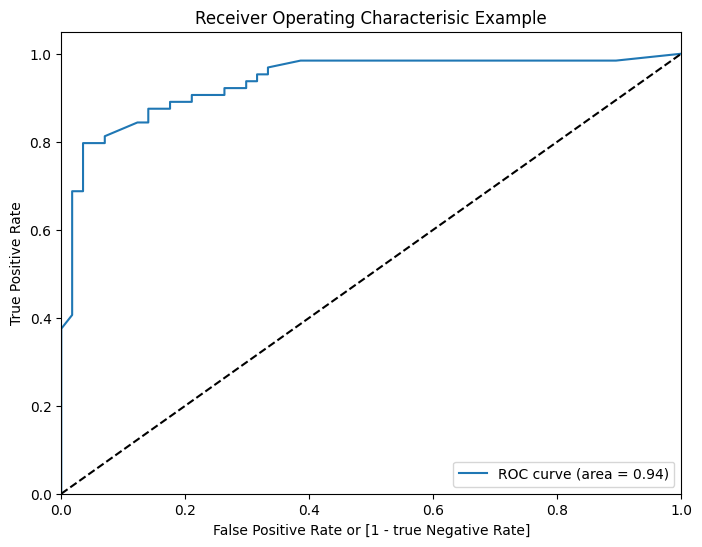

In [60]:
_, _, _, _ = draw_roc_curve(radm_clf, test_X_b, test_y_b)

**Using GridSearchCV to get the optimal parameters**

In [61]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth': [3, 5, 7, 9], 'n_estimators': [50, 100, 200, 500], 'max_features': [0.1, 0.2, 0.3, 0.5]}]

radm_clf = RandomForestClassifier()

clf = GridSearchCV(radm_clf, tuned_parameters, cv=5, scoring='roc_auc')

clf.fit(train_X_b, train_y_b)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [3, 5, 7, 9],
                          'max_features': [0.1, 0.2, 0.3, 0.5],
                          'n_estimators': [50, 100, 200, 500]}],
             scoring='roc_auc')

In [65]:
clf.best_score_

np.float64(0.9138496888116949)

In [63]:
clf.best_params_

{'max_depth': 9, 'max_features': 0.2, 'n_estimators': 500}

**Building Final Model using the best parameters**

In [69]:
radm_clf_2 = RandomForestClassifier(max_depth=9, n_estimators=500, max_features=0.2)

radm_clf_2.fit(train_X_b, train_y_b)

RandomForestClassifier(max_depth=9, max_features=0.2, n_estimators=500)

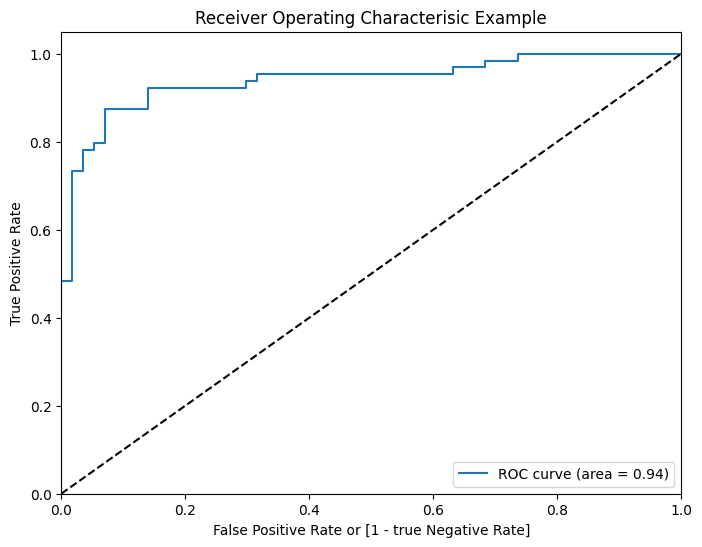

In [70]:
_, _, _, _ = draw_roc_curve(radm_clf_2, test_X_b, test_y_b)

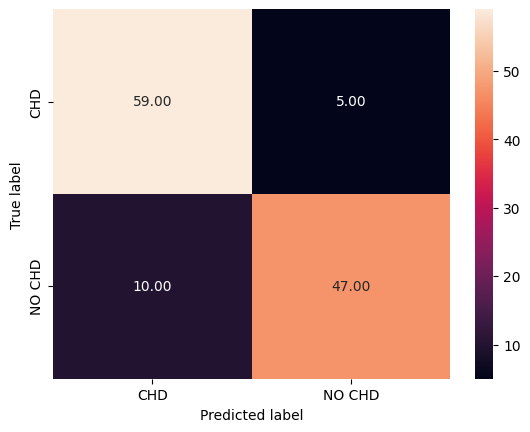

In [72]:
pred_y_b2 = radm_clf_2.predict(test_X_b)
draw_cm(test_y_b, pred_y_b2)

**Q6. Find features importance from the model built and report the top features which explain 95% of information or variance in the dataset.**

**Ans:-**

<Axes: xlabel='importance', ylabel='feature'>

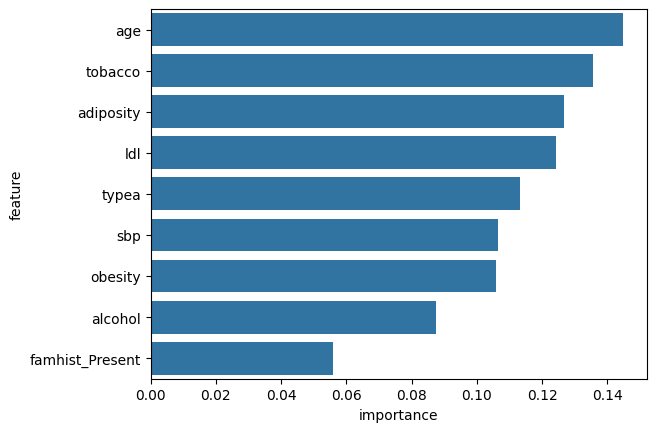

In [73]:
feature_rank = pd.DataFrame({'feature': train_X_b.columns, 'importance': radm_clf_2.feature_importances_})

feature_rank = feature_rank.sort_values('importance', ascending=False)

sn.barplot(y='feature', x='importance', data=feature_rank)

In [74]:
feature_rank['cumsum'] = feature_rank.importance.cumsum() * 100
feature_rank.head(10)

,feature,importance,cumsum
7,age,0.144835,14.483549
1,tobacco,0.135564,28.039976
3,adiposity,0.126611,40.701115
2,ldl,0.124324,53.133550
4,typea,0.113324,64.465954
0,sbp,0.106380,75.103955
5,obesity,0.105745,85.678469
6,alcohol,0.087411,94.419601
8,famhist_Present,0.055804,100.000000


In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_b)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Number of components selected:", pca.n_components_)

loadings = pd.DataFrame(
    np.abs(pca.components_),
    columns=X_b.columns
)

# Sum contributions of each original feature across selected components
feature_importance = loadings.sum().sort_values(ascending=False)

# Top N features contributing to 95% variance
top_features = feature_importance.head(10)
print(top_features)

Number of components selected: 8
sbp                2.528573
tobacco            2.514950
famhist_Present    2.475517
typea              2.297604
obesity            2.237040
ldl                2.232795
alcohol            2.190387
age                1.948444
adiposity          1.462188
dtype: float64


**Q7. Build a decision tree model using the features selected above and the following parameters:**
* max_depth = 4
* Criterion = "entropy"

**Interpret the rules generated by the decision tree. Explain how these rules can be used in the real world.**


**Ans:-**

In [80]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf_tree.fit(train_X_b, train_y_b)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [81]:
tree_predict = clf_tree.predict(test_X_b)
metrics.roc_auc_score(test_y_b, tree_predict)

np.float64(0.7354714912280703)

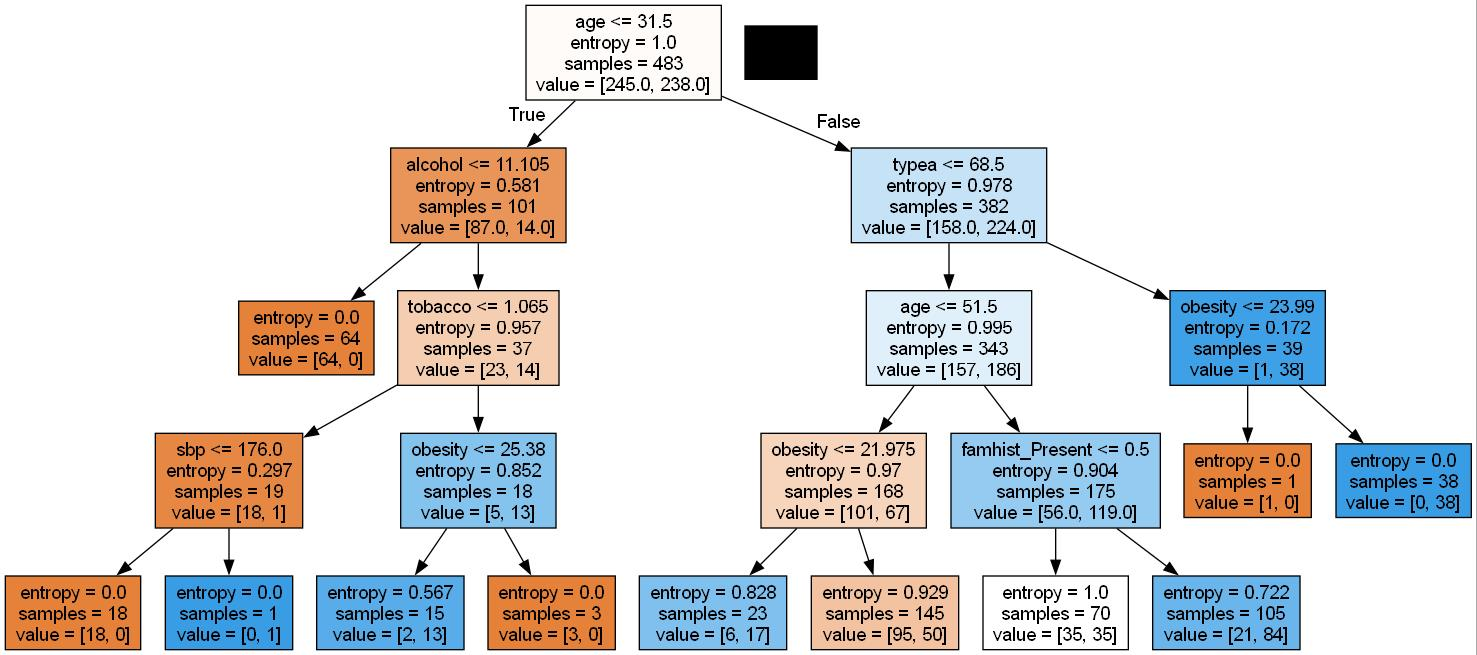

In [82]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

# Export the tree into odt file
export_graphviz(clf_tree, out_file="chd_tree5.odt", feature_names=train_X_b.columns, filled=True)

# Read and create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree5.odt')
chd_tree_graph.write_jpg('chd_tree5.png')

# Render the png file
Image(filename='chd_tree5.png')